## Data Analysis on Tinder Data

In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.dates import date2num

In [2]:
# Opening JSON file 
f = open('data.json',)
data = json.load(f) 

In [3]:
usage = data['Usage']
usage['swipes_passes']
likes = 0
passes = 0
matches = 0
for i in usage['swipes_likes']:
    likes += usage['swipes_likes'][i]
    passes += usage['swipes_passes'][i]
    matches += usage['matches'][i]

### Total Output:

In [4]:
total_match_rate = (matches/likes)
print(f'Likelihood of matching: {round((matches/likes)*100, 3)}%')
print(f'Likelihood of swiping right: {round((likes/(likes + passes)*100), 3)}%')

Likelihood of matching: 8.223%
Likelihood of swiping right: 25.113%


### Looking at only one month of data

In [5]:
import datetime
app_opens = {}
matches_dict = {}
likes_dict = {}
swipes_dict = {}
likes = 0
passes = 0
matches = 0
messages_sent = 0
messages_received = 0

for i in data['Usage']['swipes_likes']:
    if datetime.datetime.strptime(i, '%Y-%m-%d') >  datetime.datetime(2020, 9, 1, 0, 0):  
        likes += usage['swipes_likes'][i]
        passes += usage['swipes_passes'][i]
        matches += usage['matches'][i]
        messages_sent += usage['messages_sent'][i]
        messages_received += usage['messages_received'][i]
       #app_opens[datetime.datetime.strptime(i, '%Y-%m-%d')] = data['Usage']['swipes_likes'][i]
        app_opens[datetime.datetime.strptime(i, '%Y-%m-%d')] = data['Usage']['app_opens'][i]
        matches_dict[datetime.datetime.strptime(i, '%Y-%m-%d')] = data['Usage']['matches'][i]
        likes_dict[datetime.datetime.strptime(i, '%Y-%m-%d')] = data['Usage']['swipes_likes'][i]
        swipes_dict[datetime.datetime.strptime(i, '%Y-%m-%d')] = data['Usage']['swipes_passes'][i] + data['Usage']['swipes_likes'][i]

In [6]:
print(f'Number of likes: {likes}')
print(f'Number of passes: {passes}')
print(f'Number of matches: {matches}')
print(f'Number of sent messages: {messages_sent}')
print(f'Number of received messages: {messages_received}')
print(f'Likelihood of matching: {round((matches/likes)*100, 3)}%')
print(f'Likelihood of swiping right: {round((likes/passes)*100, 3)}%')

Number of likes: 1167
Number of passes: 2618
Number of matches: 146
Number of sent messages: 310
Number of received messages: 240
Likelihood of matching: 12.511%
Likelihood of swiping right: 44.576%


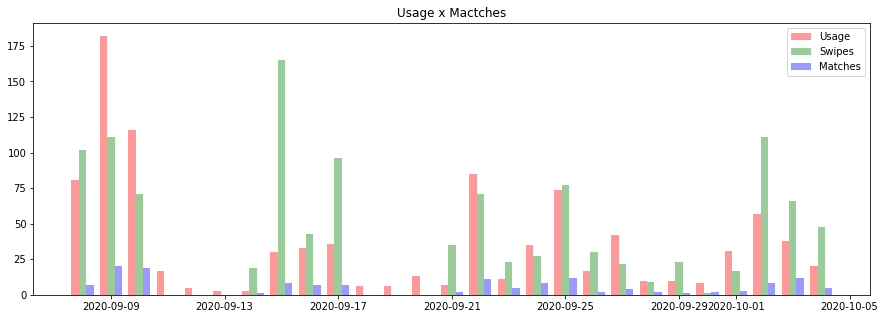

In [7]:
fig, ax = plt.subplots(figsize=(15, 5))
w = 0.26
x = date2num(list(matches_dict.keys()))
ax.bar(x-w, app_opens.values(), width=w, color='r', align='center', label = 'Usage', alpha = 0.4)
ax.bar(x, likes_dict.values(), width=w, color='g', align='center', label = 'Swipes', alpha = 0.4)
ax.bar(x+w, matches_dict.values(), width=w, color='b', align='center', label = 'Matches', alpha = 0.4)
ax.xaxis_date()
ax.autoscale(tight=False)
plt.title('Usage x Mactches')
ax.legend()
plt.show()

In [8]:
ratio = []
ratio2 = []
for i in range (len(likes_dict.values())):
    if list(likes_dict.values())[i] != 0:
        ratio.append(list(matches_dict.values())[i]/list(likes_dict.values())[i])
        ratio2.append(list(likes_dict.values())[i]/list(swipes_dict.values())[i])
    else:
        ratio.append(0)
        ratio2.append(0)

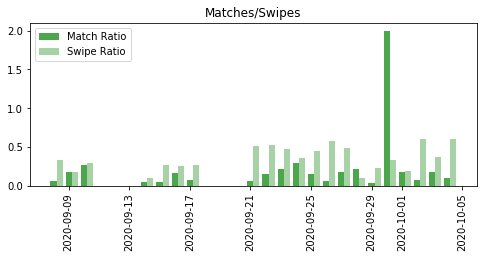

In [9]:
fig, ax = plt.subplots(figsize=(8, 3))
w = 0.40
x = date2num(list(matches_dict.keys()))
#ax.bar(x-w, app_opens.values(), width=w, color='b', align='center', label = 'Usage', alpha = 0.8)
ax.bar(x, ratio, color='g', width = w, align='center', label = 'Match Ratio', alpha = 0.7)
ax.bar(x+w, ratio2, color='g', width = w, align='center', label = 'Swipe Ratio', alpha = 0.35)
ax.xaxis_date()
ax.autoscale(tight=False)
plt.title('Matches/Swipes')
plt.xticks(rotation='vertical')
ax.legend()
plt.show()

In [10]:
print(f'Profiles: {sum(list(swipes_dict.values()))}')
print(f'Swiped Right: {likes}')
print(f'Matches {matches}')
print('Messages sent: 62')
print('Replies: 39')
print('Conversations moved off tinder: 9')
print('Real-Life Experience: 1')

Profiles: 3785
Swiped Right: 1167
Matches 146
Messages sent: 62
Replies: 39
Conversations moved off tinder: 9
Real-Life Experience: 1


In [11]:
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
def show_values_on_bars2(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            value = f'{value}%'
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

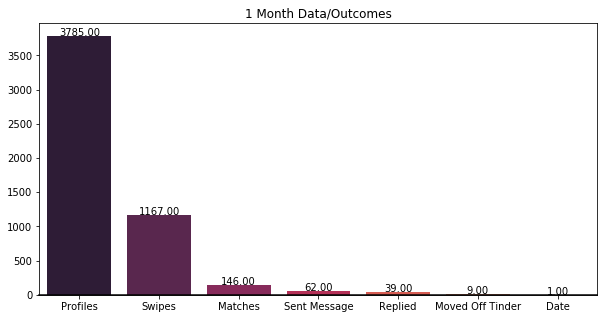

In [12]:
import seaborn as sns
import numpy as np


# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
# Generate some sequential data
x = np.array(['Profiles','Swipes','Matches','Sent Message','Replied','Moved Off Tinder', 'Date'])
y1 = np.array([3785, 1167, 146, 62, 39, 9, 1])
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.title('1 Month Data/Outcomes')

show_values_on_bars(ax1)

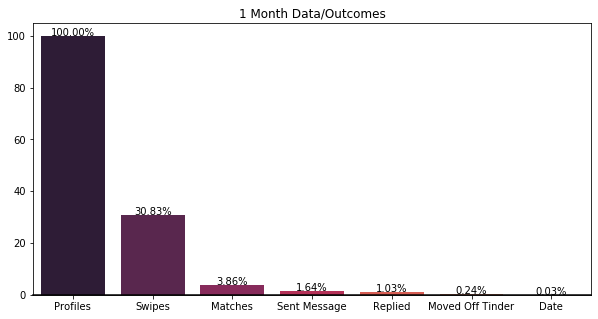

In [13]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
# Generate some sequential data
x = np.array(['Profiles','Swipes','Matches','Sent Message','Replied','Moved Off Tinder', 'Date'])
vals = [i*100 for i in [3785/3785, 1167/3785, 146/3785, 62/3785, 39/3785, 9/3785, 1/3785]]
y1 = np.array(vals)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.title('1 Month Data/Outcomes')

show_values_on_bars2(ax1)

In [14]:
stats_vals = []
vals = [3785, 1167, 146, 62, 39, 9, 1]
for i in range (len(vals)):
    if i == 0:
        value = (vals[i]/vals[i])*100
        stats_vals.append(value)
    else:
        value = (vals[i]/vals[i-1])*100
        stats_vals.append(value)

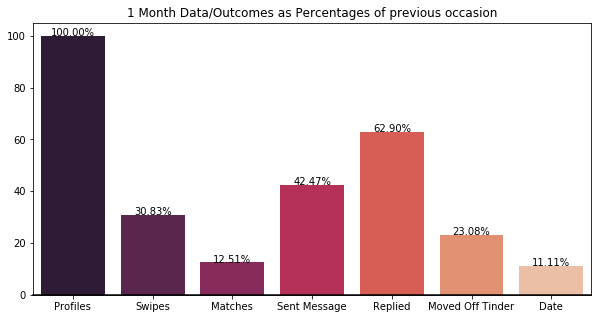

In [15]:
# Set up the matplotlib figure
f, ax1 = plt.subplots(1, 1, figsize=(10, 5), sharex=True)
# Generate some sequential data
x = np.array(['Profiles','Swipes','Matches','Sent Message','Replied','Moved Off Tinder', 'Date'])
y1 = np.array(stats_vals)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
plt.title('1 Month Data/Outcomes as Percentages of previous occasion')

show_values_on_bars2(ax1)

### Looking at another month of data == January

In [16]:
jan_likes = 0
jan_passes = 0
jan_matches = 0
jan_messages_sent = 0
jan_messages_received = 0

for i in data['Usage']['swipes_likes']:
    if datetime.datetime.strptime(i, '%Y-%m-%d').month == 1  :  
        jan_likes += usage['swipes_likes'][i]
        jan_passes += usage['swipes_passes'][i]
        jan_matches += usage['matches'][i]
        jan_messages_sent += usage['messages_sent'][i]
        jan_messages_received += usage['messages_received'][i]

In [17]:
print(f'Number of likes: {jan_likes}')
print(f'Number of passes: {jan_passes}')
print(f'Number of matches: {jan_matches}')
print(f'Number of sent messages: {jan_messages_sent}')
print(f'Number of received messages: {jan_messages_received}')
print(f'Likelihood of matching: {round((jan_matches/jan_likes)*100, 3)}%')
print(f'Likelihood of swiping right: {round((jan_likes/jan_passes)*100, 3)}%')

Number of likes: 730
Number of passes: 2079
Number of matches: 59
Number of sent messages: 32
Number of received messages: 30
Likelihood of matching: 8.082%
Likelihood of swiping right: 35.113%


### Does month matter?

In [18]:
jan_match_rate = jan_matches/jan_likes
sep_match_rate = matches/likes

In [19]:
print(jan_match_rate)
print(sep_match_rate)
print(total_match_rate)

0.08082191780821918
0.12510711225364182
0.08222698072805139


In [20]:
pooled_match_rate = (jan_matches+matches)/(likes+jan_likes)
pooled_match_rate

0.10806536636794939

In [21]:
jan_group = np.random.binomial(jan_likes, pooled_match_rate, 20000)/jan_likes
sep_group = np.random.binomial(likes, pooled_match_rate, 20000)/likes
diff_sim = sep_group - jan_group
diff_observed = sep_match_rate - jan_match_rate
diff_observed

0.04428519444542264

The probability of observing a difference of 4.43% is 0.13%


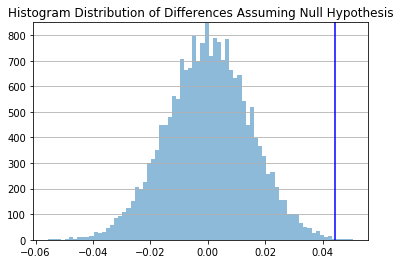

In [22]:
n, bins, patches = plt.hist(x=diff_sim, bins='auto', alpha = 0.5)
plt.grid(axis='y')
maxfreq = n.max()
plt.ylim(ymax=np.ceil(maxfreq/10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.axvline(x=diff_observed, c='blue')
empirical_p_value = len(diff_sim[diff_sim>=diff_observed])/10000
print(f'The probability of observing a difference of {round(diff_observed*100,2)}% is {empirical_p_value*100}%')
plt.title('Histogram Distribution of Differences Assuming Null Hypothesis')
plt.show()

P-Value is below 0.05, we reject the null hypothesis. 

We can not conclude however that the difference between january and september for subject's tinder success is correlated with the time of the year. Confounding variables can exist. We can, however, conclude that whatever change user did with profile or whatever change in enviroment was extremely significant. 

### Selectivity Analysis

In [23]:
y1 = list(data['Usage']['matches'].values())
x1 = []
for a, b in zip(list(data['Usage']['swipes_likes'].values()),list(data['Usage']['swipes_passes'].values())):
    if b == 0:
        x1.append(0)
    else:
        ratio = a / (a+b)
        x1.append(ratio)

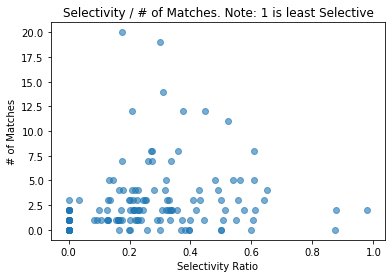

In [24]:
plt.scatter(x1,y1, alpha = 0.6)
plt.title('Selectivity / # of Matches. Note: 1 is least Selective')
plt.xlabel('Selectivity Ratio')
plt.ylabel('# of Matches')
plt.show()

In [25]:
import scipy.stats as stats

In [26]:
correlation, p_value = stats.pearsonr(x1, y1)
print(f'Correlation: {correlation}')
print(f'P-Value: {p_value}')

Correlation: 0.23503888248587204
P-Value: 0.0037889553417697034


Conclusion: No correlation there